<a href="https://colab.research.google.com/github/Yodapythonpp/GRAVITON2.0-GeminiForces/blob/main/GeminiForces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum Implementation

In [54]:
!pip install qiskit==0.43.0
!pip install qiskit-aer==0.12.0
!pip install networkx
!pip install matplotlib

In [55]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from operator import itemgetter
from scipy.optimize import minimize
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [56]:

set_of_coordinates = [[1,2],[2,3],[0,2],[1,3],[1,4]]

In [57]:
import random

# Initialize an empty list to hold the coordinate pairs
set_of_coordinates = []

# Loop 1000 times to generate 1000 random coordinate pairs
for i in range(1000):
    # Generate a random x-coordinate (between 0 and 50)
    x = random.randint(0, 50)
    # Generate a random y-coordinate (between 0 and 50)
    y = random.randint(0, 50)
    # Append the coordinate pair (x, y) to the list
    set_of_coordinates.append((x, y))

# Print the list of coordinate pairs
print(set_of_coordinates)

[(43, 48), (29, 5), (41, 4), (39, 46), (33, 11), (22, 41), (25, 20), (37, 14), (0, 35), (2, 22), (7, 18), (31, 35), (6, 7), (1, 48), (26, 39), (34, 33), (7, 49), (3, 31), (9, 45), (43, 18), (26, 24), (19, 30), (40, 6), (22, 29), (12, 45), (5, 21), (26, 48), (26, 6), (27, 11), (1, 47), (23, 30), (24, 16), (24, 33), (44, 27), (27, 22), (0, 42), (18, 35), (12, 37), (44, 11), (16, 36), (4, 36), (42, 38), (49, 24), (2, 25), (24, 0), (24, 38), (12, 7), (31, 23), (5, 17), (49, 49), (22, 39), (37, 37), (45, 15), (9, 18), (3, 37), (5, 12), (48, 17), (18, 50), (36, 6), (25, 47), (43, 4), (49, 49), (39, 19), (35, 29), (29, 1), (15, 21), (47, 30), (4, 33), (20, 27), (37, 3), (33, 15), (28, 15), (2, 3), (47, 15), (2, 46), (39, 0), (18, 45), (16, 4), (25, 38), (43, 22), (1, 48), (6, 10), (32, 17), (31, 49), (1, 4), (41, 39), (46, 48), (23, 49), (24, 40), (4, 5), (32, 3), (29, 25), (0, 15), (41, 24), (6, 46), (46, 28), (21, 20), (46, 2), (16, 34), (9, 38), (26, 17), (18, 47), (47, 23), (36, 48), (17,

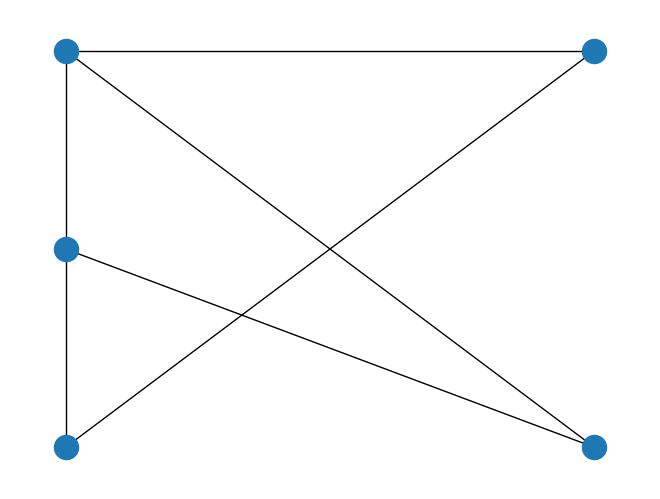

In [61]:
set_of_coordinates = [1,2],[1,3],[0,1],[0,4],[2,3],[2,4]
G = nx.Graph()
G.add_edges_from(set_of_coordinates)
nx.draw(G, pos=nx.bipartite_layout(G, [0,1,2]))

In [62]:
def append_zz_term(qc, q1, q2, gamma):
    qc.cx(q1,q2)
    qc.rz(2*gamma, q2)
    qc.cx(q1,q2)

def append_cost_operator_circuit(qc, G, gamma):
    for i, j in G.edges():
        append_zz_term(qc, i, j, gamma)

In [63]:
N = G.number_of_nodes()
qc = QuantumCircuit(N)
append_cost_operator_circuit(qc, G, np.pi / 3)
qc.draw()

┌───┐┌──────────┐┌───┐     »
q_0: ────────────────────────────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├─────»
                                                 └─┬─┘└──────────┘└─┬─┘     »
q_1: ──■────────────────■────■────────────────■────■────────────────■───────»
     ┌─┴─┐┌──────────┐┌─┴─┐  │                │                             »
q_2: ┤ X ├┤ Rz(2π/3) ├┤ X ├──┼────────────────┼────■────────────────■────■──»
     └───┘└──────────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌─┴─┐┌──────────┐┌─┴─┐  │  »
q_3: ──────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├┤ X ├┤ Rz(2π/3) ├┤ X ├──┼──»
                           └───┘└──────────┘└───┘└───┘└──────────┘└───┘┌─┴─┐»
q_4: ──────────────────────────────────────────────────────────────────┤ X ├»
                                                                       └───┘»
«                                            
«q_0: ───────────────────■────────────────■──
«                        │                │  
«q_1: ───────────────────┼────────────────┼──
«                        │                │  
«q_2: ──────────────■────┼────────────────┼──
«                   │    │                │  
«q_3: ──────────────┼────┼────────────────┼──
«     ┌──────────┐┌─┴─┐┌─┴─┐┌──────────┐┌─┴─┐
«q_4: ┤ Rz(2π/3) ├┤ X ├┤ X ├┤ Rz(2π/3) ├┤ X ├
«     └──────────┘└───┘└───┘└──────────┘└───┘

In [64]:
def append_x_term(qc, q1, beta):
    qc.rx(2*beta, q1)

def append_mixer_operator_circuit(qc, G, beta):
    for n in G.nodes():
        append_x_term(qc, n, beta)
    return qc

In [65]:
N = G.number_of_nodes()
qc = QuantumCircuit(N)
append_mixer_operator_circuit(qc, G, np.pi/3)
qc.draw()

┌──────────┐
q_0: ┤ Rx(2π/3) ├
     ├──────────┤
q_1: ┤ Rx(2π/3) ├
     ├──────────┤
q_2: ┤ Rx(2π/3) ├
     ├──────────┤
q_3: ┤ Rx(2π/3) ├
     ├──────────┤
q_4: ┤ Rx(2π/3) ├
     └──────────┘

In [66]:
def get_qaoa_circuit(G, beta, gamma):
    assert(len(beta) == len(gamma))
    p = len(beta) # infering number of QAOA steps from the parameters passed
    N = G.number_of_nodes()
    qc = QuantumCircuit(N,N)
    # first, apply a layer of Hadamards
    qc.h(range(N))
    # second, apply p alternating operators
    for i in range(p):
        append_cost_operator_circuit(qc, G, beta[i])
        append_mixer_operator_circuit(qc, G, gamma[i])
    # finally, do not forget to measure the result!
    qc.barrier(range(N))
    qc.measure(range(N), range(N))
    return qc

In [67]:
qc = get_qaoa_circuit(G,[np.pi/3], [np.pi/2])
qc.draw()

┌───┐                                            ┌───┐┌──────────┐┌───┐»
q_0: ┤ H ├────────────────────────────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├»
     ├───┤                                            └─┬─┘└──────────┘└─┬─┘»
q_1: ┤ H ├──■────────────────■────■────────────────■────■────────────────■──»
     ├───┤┌─┴─┐┌──────────┐┌─┴─┐  │                │                        »
q_2: ┤ H ├┤ X ├┤ Rz(2π/3) ├┤ X ├──┼────────────────┼────■────────────────■──»
     ├───┤└───┘└──────────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌─┴─┐┌──────────┐┌─┴─┐»
q_3: ┤ H ├──────────────────────┤ X ├┤ Rz(2π/3) ├┤ X ├┤ X ├┤ Rz(2π/3) ├┤ X ├»
     ├───┤                      └───┘└──────────┘└───┘└───┘└──────────┘└───┘»
q_4: ┤ H ├──────────────────────────────────────────────────────────────────»
     └───┘                                                                  »
c: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                     ┌───────┐ ░ ┌─┐         »
«q_0: ────────────────────────────■────────────────■──┤ Rx(π) ├─░─┤M├─────────»
«     ┌───────┐                   │                │  └───────┘ ░ └╥┘┌─┐      »
«q_1: ┤ Rx(π) ├───────────────────┼────────────────┼────────────░──╫─┤M├──────»
«     └───────┘                   │   ┌───────┐    │            ░  ║ └╥┘┌─┐   »
«q_2: ────■──────────────────■────┼───┤ Rx(π) ├────┼────────────░──╫──╫─┤M├───»
«         │     ┌───────┐    │    │   └───────┘    │            ░  ║  ║ └╥┘┌─┐»
«q_3: ────┼─────┤ Rx(π) ├────┼────┼────────────────┼────────────░──╫──╫──╫─┤M├»
«       ┌─┴─┐  ┌┴───────┴─┐┌─┴─┐┌─┴─┐┌──────────┐┌─┴─┐┌───────┐ ░  ║  ║  ║ └╥┘»
«q_4: ──┤ X ├──┤ Rz(2π/3) ├┤ X ├┤ X ├┤ Rz(2π/3) ├┤ X ├┤ Rx(π) ├─░──╫──╫──╫──╫─»
«       └───┘  └──────────┘└───┘└───┘└──────────┘└───┘└───────┘ ░  ║  ║  ║  ║ »
«c: 5/═════════════════════════════════════════════════════════════╩══╩══╩══╩═»
«                                                                  0  1  2  3 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ───
«        
«q_3: ───
«     ┌─┐
«q_4: ┤M├
«     └╥┘
«c: 5/═╩═
«      4

In [68]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

In [69]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
print(invert_counts(result.get_counts()))

{'11001': 28, '11110': 31, '10101': 28, '01011': 39, '10010': 32, '10100': 40, '10001': 29, '00011': 28, '11111': 30, '11011': 33, '00001': 27, '01101': 34, '01000': 31, '00101': 32, '11101': 35, '00111': 30, '01001': 39, '10000': 28, '01100': 31, '00100': 30, '00000': 31, '10011': 44, '00010': 35, '00110': 32, '01111': 31, '11010': 38, '01010': 28, '11100': 33, '11000': 30, '10110': 37, '01110': 26, '10111': 24}


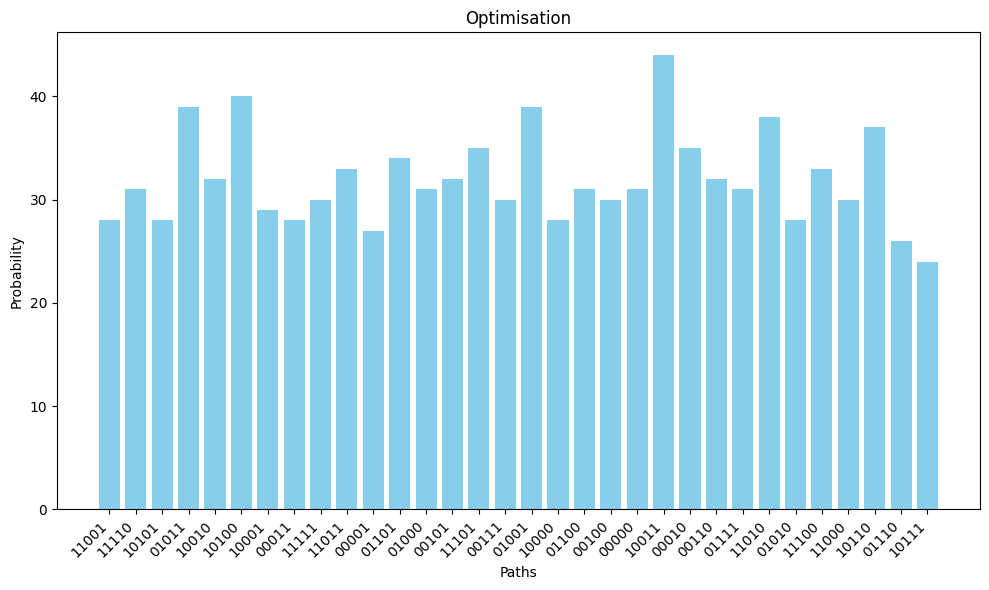

In [70]:
import matplotlib.pyplot as plt

def plot_bar_graph(data_dict, title="Bar Graph", xlabel="Keys", ylabel="Values"):
    keys = list(data_dict.keys())
    values = list(data_dict.values())

    plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches

    plt.bar(keys, values, color='skyblue')  # Plotting the bar graph

    plt.title(title)  # Set the title of the graph
    plt.xlabel(xlabel)  # Set the label for x-axis
    plt.ylabel(ylabel)  # Set the label for y-axis

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels

    plt.show()  # Display the plot

# Example usage:
data = invert_counts(result.get_counts())

plot_bar_graph(data, title="Optimisation", xlabel="Paths", ylabel="Probability")


**Classical Implementation**

In [71]:
def path_to_coordinates(path):
    # Define starting point
    x, y = 0, 0
    coordinates = [(x, y)]  # Add starting point to coordinates list

    # Interpret the path
    for step in path:
        if step == '0':
            x += 1  # Move along x-axis
        elif step == '1':
            y += 1  # Move along y-axis
        coordinates.append((x, y))  # Add current coordinates to the list

    return coordinates

# Example path
path = "00000"

# Convert path to coordinates
coordinates = path_to_coordinates(path)

# Print the coordinates of each node
for i, coord in enumerate(coordinates):
    print(f"Node {i+1}: {coord}")

Node 1: (0, 0)
Node 2: (1, 0)
Node 3: (2, 0)
Node 4: (3, 0)
Node 5: (4, 0)
Node 6: (5, 0)


Enter the number of nodes in your graph: 3
Enter coordinates for node 1 (x, y): 
1,2
Enter coordinates for node 2 (x, y): 
0,1
Enter coordinates for node 3 (x, y): 
1,3
Do you want to define edges between nodes? (y/n): y
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
1 2 0 1
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
1 2 1 3
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
q


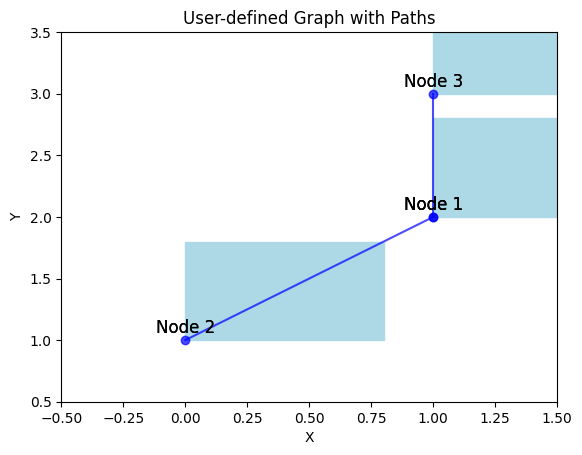

In [72]:
import matplotlib.pyplot as plt

# Get user input for number of nodes
num_nodes = int(input("Enter the number of nodes in your graph: "))

# Initialize empty lists for nodes and edges
nodes = []
edges = []

# Get user input for node coordinates (accepting floats)
for i in range(num_nodes):
    print(f"Enter coordinates for node {i+1} (x, y): ")
    x, y = map(float, input().split(","))  # Split by comma (",")

    nodes.append((x, y))  # Add coordinates as a tuple

# Get user input for edges (optional)
has_edges = input("Do you want to define edges between nodes? (y/n): ")
if has_edges.lower() == 'y':
    while True:
        print("Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): ")
        edge_input = input()
        if edge_input.lower() == 'q':
            break
        try:
            # Convert input coordinates to floats (assuming format "x y")
            start_x, start_y, end_x, end_y = map(float, edge_input.split())

            # Find indices of nodes based on coordinates (assuming unique coordinates)
            start_index = -1
            end_index = -1
            for i, node in enumerate(nodes):
                if node[0] == start_x and node[1] == start_y:
                    start_index = i
                if node[0] == end_x and node[1] == end_y:
                    end_index = i

            if start_index != -1 and end_index != -1:
                edges.append((start_index, end_index))  # Add edge as a tuple of node indices
            else:
                print("Invalid node coordinates. Please enter coordinates that match existing nodes.")
        except ValueError:
            print("Invalid input. Please enter four space-separated floating-point values (x1 y1 x2 y2).")

# Create the plot
fig, ax = plt.subplots()

# Draw edges (if any)
for start, end in edges:
    x_values = [nodes[start][0], nodes[end][0]]
    y_values = [nodes[start][1], nodes[end][1]]
    ax.plot(x_values, y_values, 'b-o', alpha=0.7)  # Blue line with circle markers

    # *Show path labels on edges:*
    for i, (x, y) in enumerate(zip(x_values, y_values)):
        if i == 0:  # Label start node
            ax.text(x, y + 0.1, f"Node {start+1}", ha='center', va='center', fontsize=12)
        else:  # Label end node
            ax.text(x, y + 0.1, f"Node {end+1}", ha='center', va='center', fontsize=12)

# Draw circles for nodes
for node in nodes:
    ax.add_patch(plt.Rectangle(xy=node, width=0.8, height=0.8, color='lightblue'))

# Add labels for nodes
for i, node in enumerate(nodes):
    ax.text(node[0], node[1] + 0.1, f"Node {i+1}", ha='center', va='center', fontsize=12)

# Set limits slightly bigger than node coordinates
plt.xlim([min(coord[0] for coord in nodes) - 0.5, max(coord[0] for coord in nodes) + 0.5])
plt.ylim([min(coord[1] for coord in nodes) - 0.5, max(coord[1] for coord in nodes) + 0.5])

# Set axes
plt.xlabel('X')
plt.ylabel('Y')

# Set title
plt.title('User-defined Graph with Paths')

plt.show()

Enter the number of nodes in your graph: 3
Enter coordinates for node 1 (x, y): 
1,2
Enter coordinates for node 2 (x, y): 
2,3
Enter coordinates for node 3 (x, y): 
0,1
Do you want to define edges between nodes? (y/n): y
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
1 2 2 3
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
2 3 0 1
Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): 
q


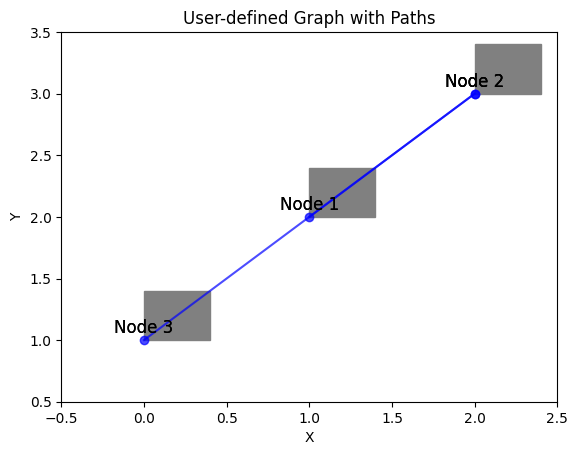

In [75]:

import matplotlib.pyplot as plt

# Get user input for number of nodes
num_nodes = int(input("Enter the number of nodes in your graph: "))

# Initialize empty lists for nodes and edges
nodes = []
edges = []

# Get user input for node coordinates (accepting floats)
for i in range(num_nodes):
    print(f"Enter coordinates for node {i+1} (x, y): ")
    x, y = map(float, input().split(","))  # Split by comma (",")

    nodes.append((x, y))  # Add coordinates as a tuple

# Get user input for edges (optional)
has_edges = input("Do you want to define edges between nodes? (y/n): ")
if has_edges.lower() == 'y':
    while True:
        print("Enter two node coordinates (separated by space) to connect with an edge (or 'q' to quit): ")
        edge_input = input()
        if edge_input.lower() == 'q':
            break
        try:
            # Convert input coordinates to floats (assuming format "x y")
            start_x, start_y, end_x, end_y = map(float, edge_input.split())

            # Find indices of nodes based on coordinates (assuming unique coordinates)
            start_index = -1
            end_index = -1
            for i, node in enumerate(nodes):
                if node[0] == start_x and node[1] == start_y:
                    start_index = i
                if node[0] == end_x and node[1] == end_y:
                    end_index = i

            if start_index != -1 and end_index != -1:
                edges.append((start_index, end_index))  # Add edge as a tuple of node indices
            else:
                print("Invalid node coordinates. Please enter coordinates that match existing nodes.")
        except ValueError:
            print("Invalid input. Please enter four space-separated floating-point values (x1 y1 x2 y2).")

# Create the plot
fig, ax = plt.subplots()

# Draw edges (if any)
for start, end in edges:
    x_values = [nodes[start][0], nodes[end][0]]
    y_values = [nodes[start][1], nodes[end][1]]
    ax.plot(x_values, y_values, 'b-o', alpha=0.7)  # Blue line with circle markers

    # *Show path labels on edges:*
    for i, (x, y) in enumerate(zip(x_values, y_values)):
        if i == 0:  # Label start node
            ax.text(x, y + 0.1, f"Node {start+1}", ha='center', va='center', fontsize=12)
        else:  # Label end node
            ax.text(x, y + 0.1, f"Node {end+1}", ha='center', va='center', fontsize=12)




# Draw rectangles for nodes (modified for grey rectangles of 0.4*0.4)
for node in nodes:
    ax.add_patch(plt.Rectangle(xy=node, width=0.4, height=0.4, color='grey'))
      # Changed color and dimensions
for i, node in enumerate(nodes):
    ax.text(node[0], node[1] + 0.1, f"Node {i+1}", ha='center', va='center', fontsize=12)

# Set limits slightly bigger than node coordinates
plt.xlim([min(coord[0] for coord in nodes) - 0.5, max(coord[0] for coord in nodes) + 0.5])
plt.ylim([min(coord[1] for coord in nodes) - 0.5, max(coord[1] for coord in nodes) + 0.5])

# Set axes
plt.xlabel('X')
plt.ylabel('Y')

# Set title
plt.title('User-defined Graph with Paths')

plt.show()



